<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keys" data-toc-modified-id="Keys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keys</a></span></li><li><span><a href="#Null-distribution:-CC-2344:-Simulated-DEGs-with-similar-expression-levels" data-toc-modified-id="Null-distribution:-CC-2344:-Simulated-DEGs-with-similar-expression-levels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Null distribution: CC-2344: Simulated DEGs with similar expression levels</a></span></li><li><span><a href="#Null-distribution:-CC-2931:-Simulated-DEGs-with-similar-expression-levels" data-toc-modified-id="Null-distribution:-CC-2931:-Simulated-DEGs-with-similar-expression-levels-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Null distribution: CC-2931: Simulated DEGs with similar expression levels</a></span></li><li><span><a href="#Changing-v6-differentially-expressed-genes-(DEGs)-to-v5" data-toc-modified-id="Changing-v6-differentially-expressed-genes-(DEGs)-to-v5-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Changing v6 differentially expressed genes (DEGs) to v5</a></span></li><li><span><a href="#Null-Hypothesis---Creating-simulated-genes" data-toc-modified-id="Null-Hypothesis---Creating-simulated-genes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Null Hypothesis - Creating simulated genes</a></span></li><li><span><a href="#Strenkert-PNAS-Coexpression-Network" data-toc-modified-id="Strenkert-PNAS-Coexpression-Network-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Strenkert PNAS Coexpression Network</a></span><ul class="toc-item"><li><span><a href="#Importing-NetworkX-Code" data-toc-modified-id="Importing-NetworkX-Code-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Importing NetworkX Code</a></span></li><li><span><a href="#NetworkX---Multi-source-function-was-amended" data-toc-modified-id="NetworkX---Multi-source-function-was-amended-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>NetworkX - Multi-source function was amended</a></span></li><li><span><a href="#Adding-distance-to-Strenkert-Co-expression-Network" data-toc-modified-id="Adding-distance-to-Strenkert-Co-expression-Network-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Adding distance to Strenkert Co-expression Network</a></span></li><li><span><a href="#Finding-the-shortest-path-between-observed-DEGs" data-toc-modified-id="Finding-the-shortest-path-between-observed-DEGs-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Finding the shortest path between observed DEGs</a></span></li><li><span><a href="#Null-Hypothesis---scripts/snakefile_networkx_shortest_paths.py" data-toc-modified-id="Null-Hypothesis---scripts/snakefile_networkx_shortest_paths.py-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Null Hypothesis - scripts/snakefile_networkx_shortest_paths.py</a></span></li><li><span><a href="#Plots---Shortest-Paths-between-DEGs-in-Co-expression-Network" data-toc-modified-id="Plots---Shortest-Paths-between-DEGs-in-Co-expression-Network-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Plots - Shortest Paths between DEGs in Co-expression Network</a></span><ul class="toc-item"><li><span><a href="#Observed-vs-Null-Distributions" data-toc-modified-id="Observed-vs-Null-Distributions-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>Observed vs Null Distributions</a></span></li><li><span><a href="#Representative-Plot-(CC-2344-L1)---Observed-vs-Null-Distributions" data-toc-modified-id="Representative-Plot-(CC-2344-L1)---Observed-vs-Null-Distributions-6.6.2"><span class="toc-item-num">6.6.2&nbsp;&nbsp;</span>Representative Plot (CC-2344 L1) - Observed vs Null Distributions</a></span></li></ul></li></ul></li><li><span><a href="#Defunct-Analysis:-Not-expression-dependent" data-toc-modified-id="Defunct-Analysis:-Not-expression-dependent-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Defunct Analysis: Not expression-dependent</a></span><ul class="toc-item"><li><span><a href="#Simulated-DEGs" data-toc-modified-id="Simulated-DEGs-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Simulated DEGs</a></span></li><li><span><a href="#Observed-vs-Null-distributions" data-toc-modified-id="Observed-vs-Null-distributions-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Observed vs Null distributions</a></span></li></ul></li></ul></div>

## Keys

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from Bio import SeqIO
import random, glob
import json
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import chisquare
stats.junk = lambda chisq, df: stats.chi2.sf(chisq, df)
import csv
import gffpandas.gffpandas as gffpd
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statistics import mean
import os

CC2344 = ["CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

#### DATAFRAME RECORDING THE GENERATION TIME PER SAMPLE ####
dic_gen = {}
generation = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/Mutation_Fitness.txt', delimiter = '\t')
generation['Sample'] = generation['Sample'].str.replace('_', '-L')
generation = generation.loc[generation['Sample'].isin(CC2344 + CC2931)]

for i in generation.index.values:
    dic_gen[generation.at[i,'Sample']] = generation.at[i, 'Generation']
    
generations = pd.Series(dic_gen)

#### MUTATIONS ####
mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
dic_mut = {maline:mutations.loc[mutations['sample'] == maline].count()[0] for maline in mutations['sample'].values.tolist()}

## Null distribution: CC-2344: Simulated DEGs with similar expression levels

In [11]:
raw_count = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2344_deseq_filtered_normalized.txt', delimiter = '\t', index_col = 'Unnamed: 0')[['CC2344-ANC-rep1', 'CC2344-ANC-rep2', 'CC2344-ANC-rep3']]
raw_count['CC2344-ANC'] = raw_count.mean(axis = 1)
conversion = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/v5.3_to_v5.6_to_v6.csv', delimiter = '\t')

DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2344).dropna()
DEGs.columns = ['index', 'sample', 'v6']


#### Creating interval ####
ei = pd.DataFrame()
expression_intervals = []
for perc in range(3, 99, 5):
    expression_intervals.append(np.percentile(raw_count['CC2344-ANC'], perc, axis=0))
    
high_expression = raw_count.loc[raw_count['CC2344-ANC'] > expression_intervals[-1]]
for perc in range(12, 101, 1):
    expression_intervals.append(np.percentile(high_expression, perc))

ei['expression_intervals'] = expression_intervals


for trials in range(0, 1):
    for sample in DEGs['sample'].unique():
        list_of_degs = list(DEGs.loc[DEGs['sample'] == sample]['v6'])
        sim_degs = []
        for degs in list_of_degs:
            deg_rawcount = raw_count.at[degs, 'CC2344-ANC']
            if deg_rawcount == 0:
                minimum = 0
            else: 
                minimum = ei.loc[ei['expression_intervals'] < deg_rawcount].max()[0]
            maximum = ei.loc[ei['expression_intervals'] > deg_rawcount].min()[0]
            a = raw_count.loc[(raw_count['CC2344-ANC'] > minimum) & (raw_count['CC2344-ANC'] < maximum)]
            v5 = np.array(conversion.loc[conversion['v6'].isin(a.index.values)]['v5.5_gene'])
            sim_degs += random.choices(v5, k = 1)
        np.savetxt('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/simulated_DEGs/similar_expression_levels/' + str(trials + 1) + '_' + sample + '.txt', sim_degs, delimiter=',', fmt = '%s')    

## Null distribution: CC-2931: Simulated DEGs with similar expression levels

In [9]:
raw_count = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_deseq_filtered_normalized.txt', delimiter = '\t', index_col = 'Unnamed: 0')[['CC2931-ANC-rep1', 'CC2931-ANC-rep2', 'CC2931-ANC-rep3']]
raw_count['CC2931-ANC'] = raw_count.mean(axis = 1)
conversion = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/v5.3_to_v5.6_to_v6.csv', delimiter = '\t')

DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2931).dropna()
DEGs.columns = ['index', 'sample', 'v6']


#### Creating interval ####
ei = pd.DataFrame()
expression_intervals = []
for perc in range(3, 99, 5):
    expression_intervals.append(np.percentile(raw_count['CC2931-ANC'], perc, axis=0))
    
high_expression = raw_count.loc[raw_count['CC2931-ANC'] > expression_intervals[-1]]
for perc in range(12, 101, 1):
    expression_intervals.append(np.percentile(high_expression, perc))

ei['expression_intervals'] = expression_intervals

for trials in range(0, 100):
    for sample in DEGs['sample'].unique():
        list_of_degs = list(DEGs.loc[DEGs['sample'] == sample]['v6'])
        sim_degs = []
        for degs in list_of_degs:
            deg_rawcount = raw_count.at[degs, 'CC2931-ANC']
            if deg_rawcount == 0:
                minimum = 0
            else: 
                minimum = ei.loc[ei['expression_intervals'] < deg_rawcount].max()[0]
            maximum = ei.loc[ei['expression_intervals'] > deg_rawcount].min()[0]
            a = raw_count.loc[(raw_count['CC2931-ANC'] > minimum) & (raw_count['CC2931-ANC'] < maximum)]
            v5 = np.array(conversion.loc[conversion['v6'].isin(a.index.values)]['v5.5_gene'])
            sim_degs += random.choices(v5, k = 1)
        np.savetxt('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/simulated_DEGs/similar_expression_levels/' + str(trials + 1) + '_' + sample + '.txt', sim_degs, delimiter=',', fmt = '%s')    

## Changing v6 differentially expressed genes (DEGs) to v5

In [2]:
#### Changing v6 DEG to v5 ####
type_gene = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')
version_conversion = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/v5.3_to_v5.6_to_v6.csv', delimiter = '\t')
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2344 + CC2931).dropna()
DEGs.columns = ['index', 'sample', 'v6']
v5_DEGs = DEGs.set_index('v6').join(version_conversion.set_index('v6')[['v5.5_gene']]).drop(columns = ['index'])

for sample in CC2344 + CC2931:
    section = v5_DEGs.loc[v5_DEGs['sample'] == sample]['v5.5_gene'].dropna()
    section.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/v5_DEGs/' + sample + '.csv', sep = '\t', index = False, header = False)

## Strenkert PNAS Coexpression Network

### Importing NetworkX Code

In [152]:
from collections import deque
from heapq import heappop, heappush
from itertools import count

import networkx as nx
from networkx.algorithms.shortest_paths.generic import _build_paths_from_predecessors

from itertools import combinations

### NetworkX - Multi-source function was amended

In [3]:
def _weight_function(G, weight):

    if callable(weight):
        return weight
    # If the weight keyword argument is not callable, we assume it is a
    # string representing the edge attribute containing the weight of
    # the edge.
    if G.is_multigraph():
        return lambda u, v, d: min(attr.get(weight, 1) for attr in d.values())
    return lambda u, v, data: data.get(weight, 1)

def _dijkstra_multisource(
    G, sources, weight, pred=None, paths=None, cutoff=None, target=None
):
    G_succ = G._adj  # For speed-up (and works for both directed and undirected graphs)

    push = heappush
    pop = heappop
    dist = {}  # dictionary of final distances
    seen = {}
    # fringe is heapq with 3-tuples (distance,c,node)
    # use the count c to avoid comparing nodes (may not be able to)
    c = count()
    fringe = []
    for source in sources:
        seen[source] = 0
        push(fringe, (0, next(c), source))
    while fringe:
        (d, _, v) = pop(fringe)
        if v in dist:
            continue  # already searched this node.
        dist[v] = d
        if v == target:
            break
        for u, e in G_succ[v].items():
            cost = weight(v, u, e)
            if cost is None:
                continue
            vu_dist = dist[v] + cost
            if cutoff is not None:
                if vu_dist > cutoff:
                    continue
            if u in dist:
                u_dist = dist[u]
                if vu_dist < u_dist:
                    raise ValueError("Contradictory paths found:", "negative weights?")
                elif pred is not None and vu_dist == u_dist:
                    pred[u].append(v)
            elif u not in seen or vu_dist < seen[u]:
                seen[u] = vu_dist
                push(fringe, (vu_dist, next(c), u))
                if paths is not None:
                    paths[u] = paths[v] + [u]
                if pred is not None:
                    pred[u] = [v]
            elif vu_dist == seen[u]:
                if pred is not None:
                    pred[u].append(v)

    # The optional predecessor and path dictionaries can be accessed
    # by the caller via the pred and paths objects passed as arguments.
    return dist

def multi_source_dijkstra(G, sources, target=None, cutoff=None, weight="weight"): ## amended code
    G_succ = G._adj
    if not sources:
        raise ValueError("sources must not be empty")
    for s in sources:
        if s not in G:
            raise nx.NodeNotFound(f"Node {s} not found in graph")
    if target in sources:
        return (0, [target])

    weight = _weight_function(G, weight)
    paths = {source: [source] for source in sources}  # dictionary of paths
    dist = _dijkstra_multisource(
        G, sources, weight, paths=paths, cutoff=cutoff, target=target
    )
    if target is None:
        return (dist, paths)
    try:
        return (dist[target], paths[target])
    except KeyError as err:
        return (0, [target]) ## amended

### Adding distance to Strenkert Co-expression Network

In [153]:
path = '/research/projects/chlamydomonas/MAexpression/'
graph = path + 'genome_info/Stenkert.PNAS.coexpression_network.gml' 
G = nx.read_gml(graph)

a = nx.get_edge_attributes(G, "weight")

################################################################################
## Adding the distance of each edge to the gml file, (distance = weight^(-1)) ##
################################################################################
for genes in a.keys():
    G.add_edge(genes[0],genes[1], distance = a[genes]**(-1))
network = nx.get_edge_attributes(G, "distance")

### Finding the shortest path between observed DEGs

In [2]:
for sample in CC2344 + CC2931:
    obs_sp = pd.DataFrame()
    lis = 0
    obs_files = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/v5_DEGs/' + sample + '.csv', delimiter = '\t')
    obs_files.columns = ['genes']
    genes = obs_files['genes'].tolist()
    genes = list(set(genes).intersection(set(G.nodes())))
    for gene in genes:
        temp_list = genes[:]
        temp_list.remove(gene)
        lis += 1
        length, path = multi_source_dijkstra(G, temp_list, target=gene, weight="distance")
        obs_sp.at[lis, 'length'] = length
        obs_sp.at[lis, 'gene1'] = path[0]
        obs_sp.at[lis, 'gene2'] = path[-1]
    obs_sp.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/v5_DEGs/chlamynet_shortest_paths/' + sample + '.csv', sep = '\t', header = True)

### Null Hypothesis - scripts/snakefile_networkx_shortest_paths.py

### Plots - Shortest Paths between DEGs in Co-expression Network

<ipython-input-3-af08ceb1bb30>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


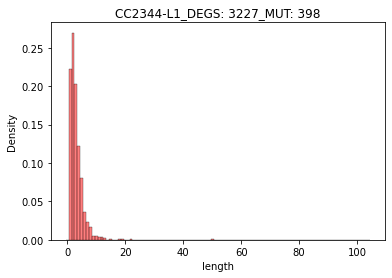

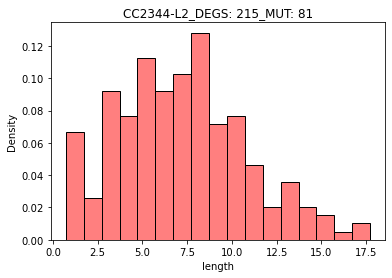

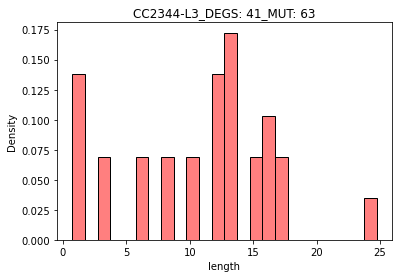

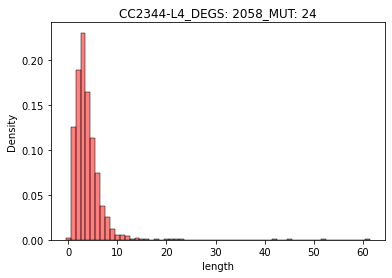

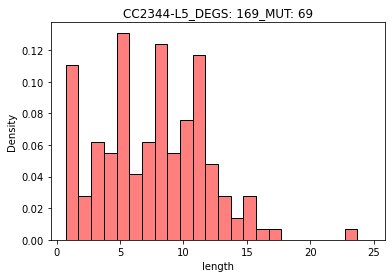

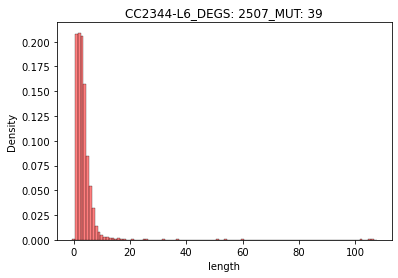

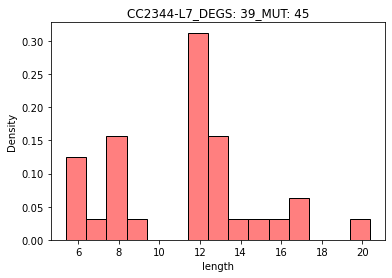

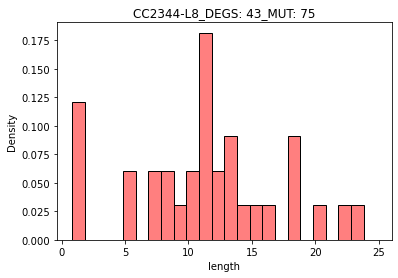

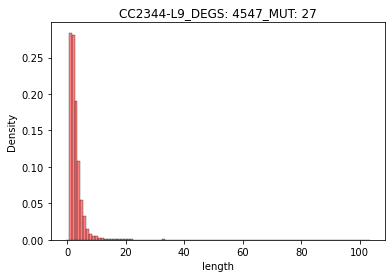

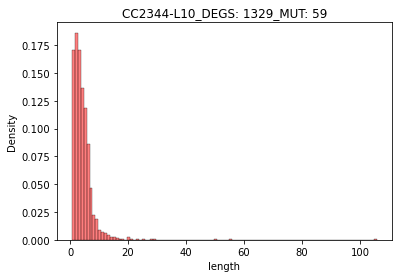

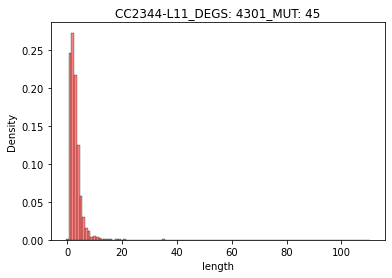

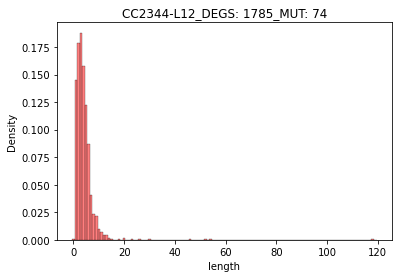

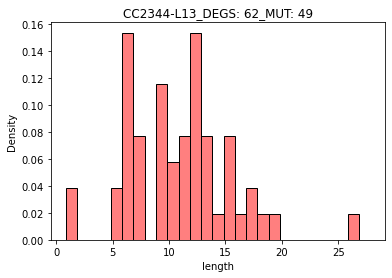

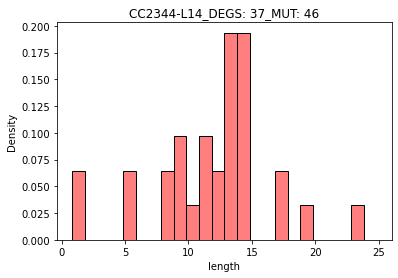

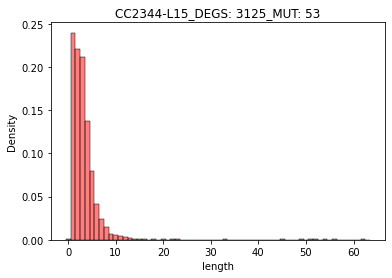

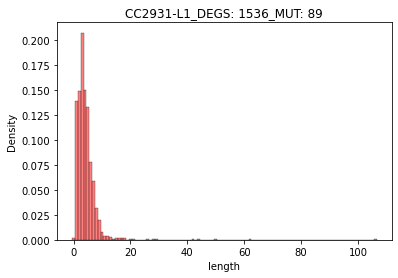

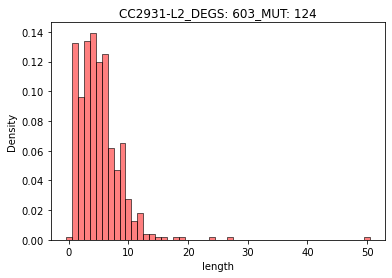

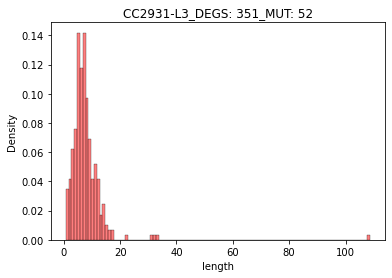

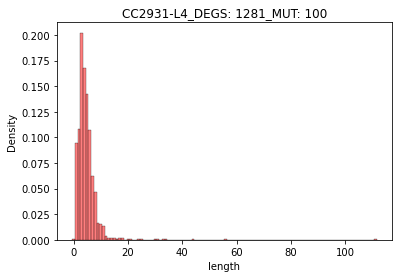

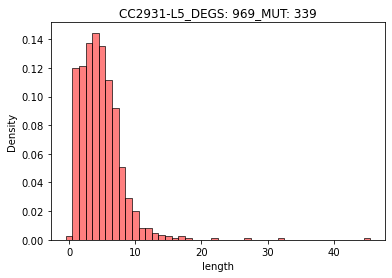

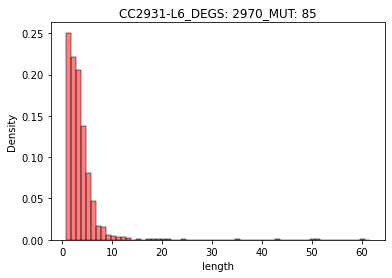

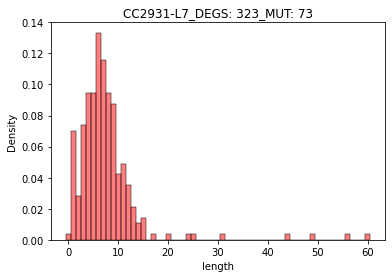

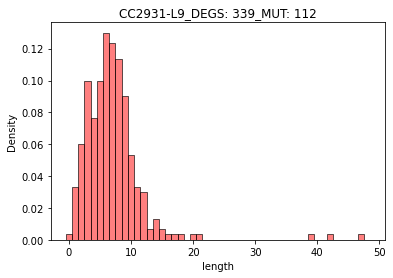

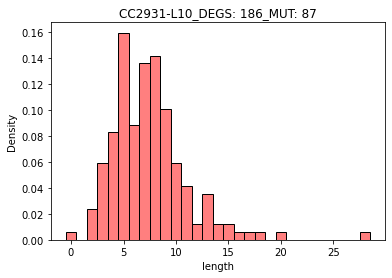

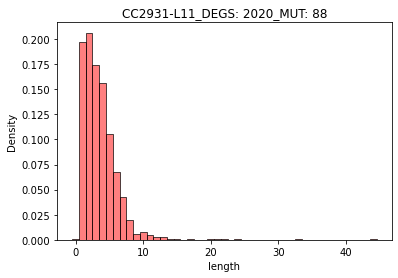

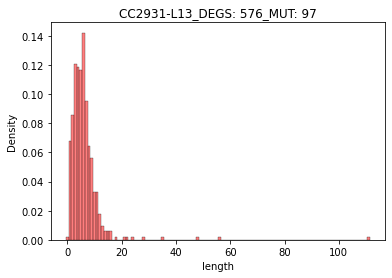

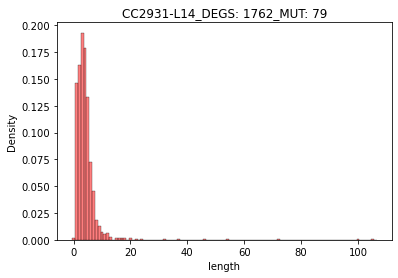

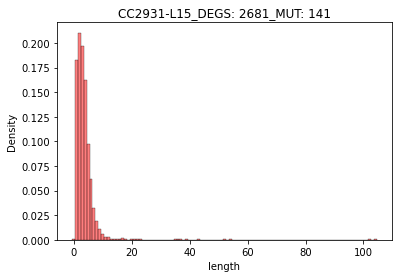

<Figure size 432x288 with 0 Axes>

In [3]:
type_gene = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')
version_conversion = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/v5.3_to_v5.6_to_v6.csv', delimiter = '\t')
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2344 + CC2931).dropna()
DEGs.columns = ['index', 'sample', 'v6']
v5_DEGs = DEGs.set_index('v6').join(version_conversion.set_index('v6')[['v5.5_gene']]).drop(columns = ['index'])
  
for sample in CC2344 + CC2931:
    ## Opening shortest paths for observed samples ##
    sp = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/v5_DEGs/chlamynet_shortest_paths/' + sample + '.csv', delimiter = '\t')
    sns.histplot(data = sp['length'], stat="density", discrete = True, color = 'red', alpha = 0.5)
    plt.title(sample + '_DEGS: ' + str(len(DEGs.loc[DEGs['sample'] == sample])) + '_MUT: ' + str(len(mutations.loc[mutations['sample'] == sample])))
    plt.figure()

#### Observed vs Null Distributions

CC2344-L1_pvalue = 0.0
CC2344-L2_pvalue = 0.23
CC2344-L3_pvalue = 0.72
CC2344-L4_pvalue = 0.06
CC2344-L5_pvalue = 0.58
CC2344-L6_pvalue = 0.0
CC2344-L7_pvalue = 0.56
CC2344-L8_pvalue = 0.69
CC2344-L9_pvalue = 0.0
CC2344-L10_pvalue = 0.0


<ipython-input-2-fbe85e9fe01d>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


CC2344-L11_pvalue = 0.02
CC2344-L12_pvalue = 0.0
CC2344-L13_pvalue = 0.82
CC2344-L14_pvalue = 0.87
CC2344-L15_pvalue = 0.0
CC2931-L1_pvalue = 0.0
CC2931-L2_pvalue = 0.0
CC2931-L3_pvalue = 0.65
CC2931-L4_pvalue = 0.58
CC2931-L5_pvalue = 0.02
CC2931-L6_pvalue = 0.0
CC2931-L7_pvalue = 0.35
CC2931-L9_pvalue = 0.69
CC2931-L10_pvalue = 0.01
CC2931-L11_pvalue = 0.0
CC2931-L13_pvalue = 0.1
CC2931-L14_pvalue = 0.0
CC2931-L15_pvalue = 0.01


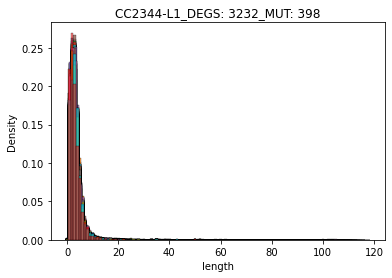

<Figure size 432x288 with 0 Axes>

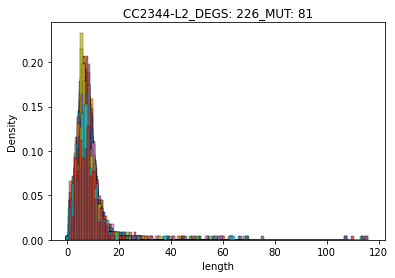

<Figure size 432x288 with 0 Axes>

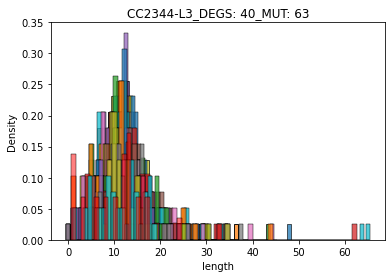

<Figure size 432x288 with 0 Axes>

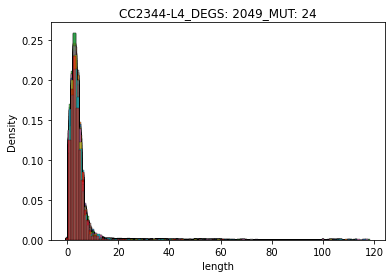

<Figure size 432x288 with 0 Axes>

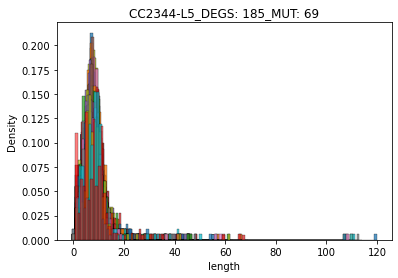

<Figure size 432x288 with 0 Axes>

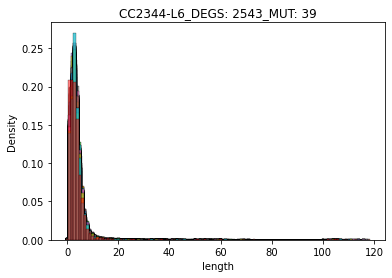

<Figure size 432x288 with 0 Axes>

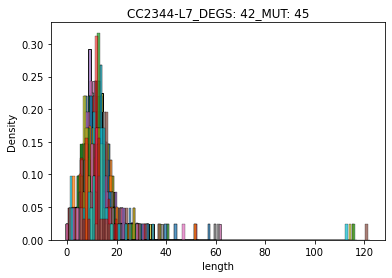

<Figure size 432x288 with 0 Axes>

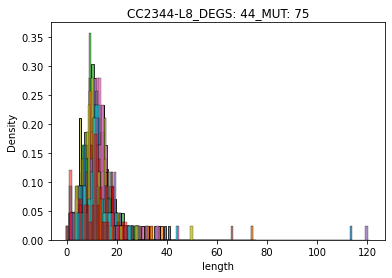

<Figure size 432x288 with 0 Axes>

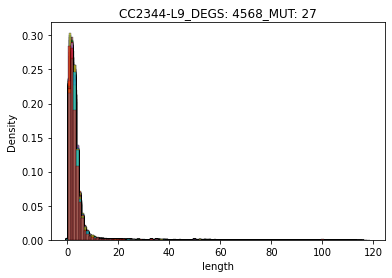

<Figure size 432x288 with 0 Axes>

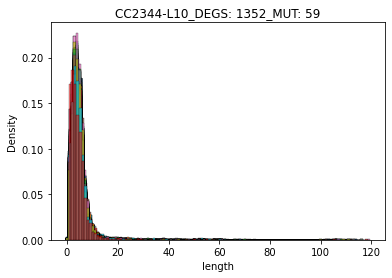

<Figure size 432x288 with 0 Axes>

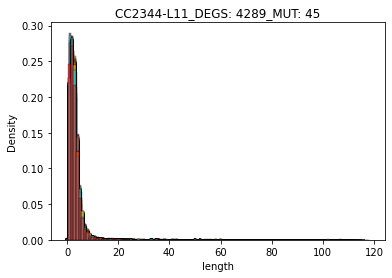

<Figure size 432x288 with 0 Axes>

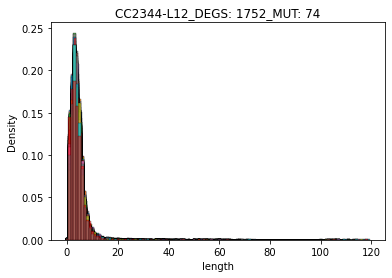

<Figure size 432x288 with 0 Axes>

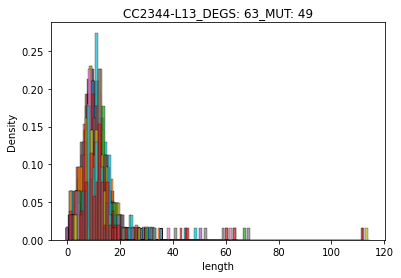

<Figure size 432x288 with 0 Axes>

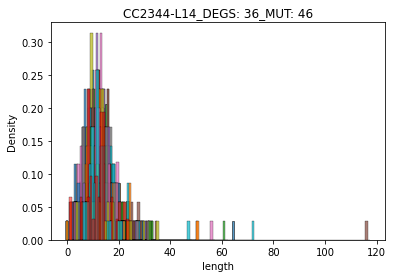

<Figure size 432x288 with 0 Axes>

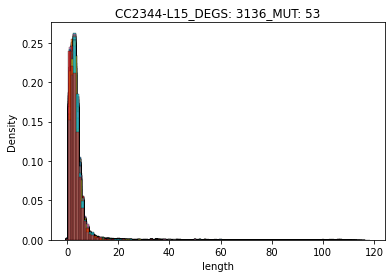

<Figure size 432x288 with 0 Axes>

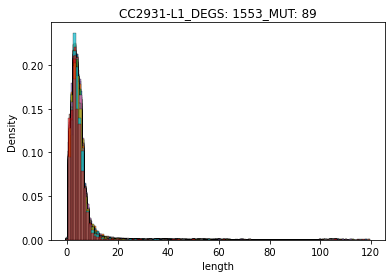

<Figure size 432x288 with 0 Axes>

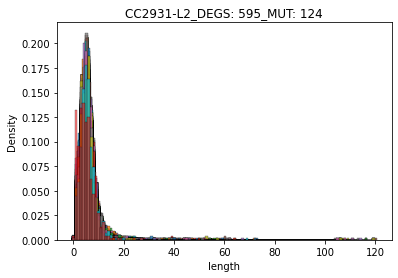

<Figure size 432x288 with 0 Axes>

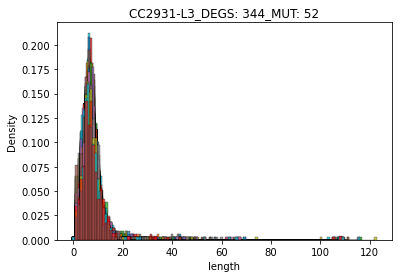

<Figure size 432x288 with 0 Axes>

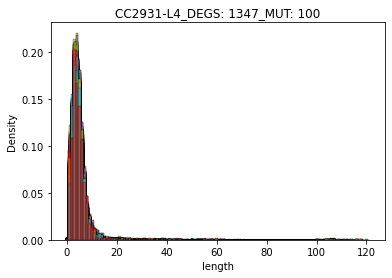

<Figure size 432x288 with 0 Axes>

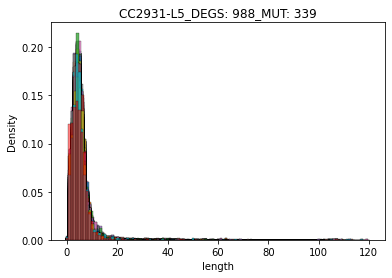

<Figure size 432x288 with 0 Axes>

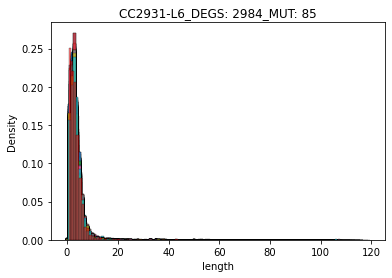

<Figure size 432x288 with 0 Axes>

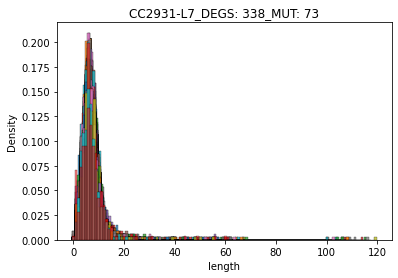

<Figure size 432x288 with 0 Axes>

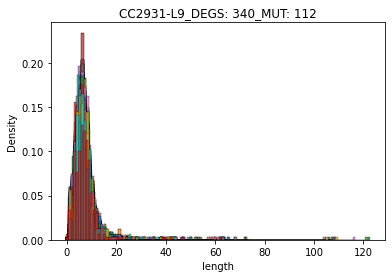

<Figure size 432x288 with 0 Axes>

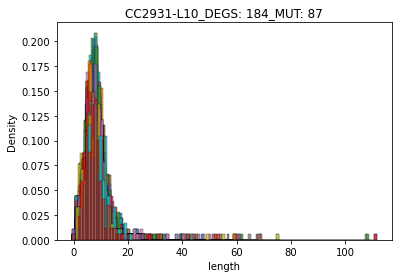

<Figure size 432x288 with 0 Axes>

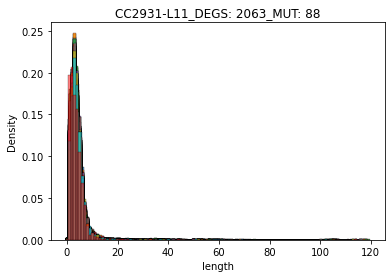

<Figure size 432x288 with 0 Axes>

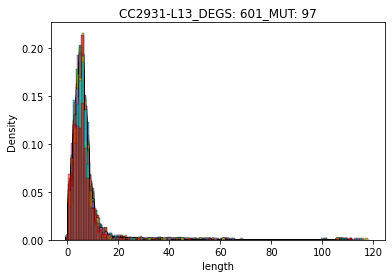

<Figure size 432x288 with 0 Axes>

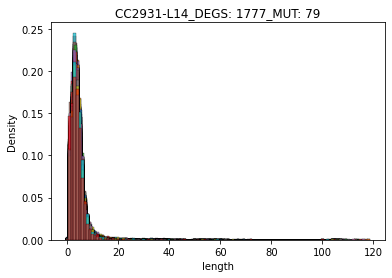

<Figure size 432x288 with 0 Axes>

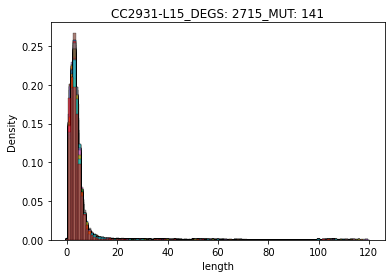

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [2]:
type_gene = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')
version_conversion = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/v5.3_to_v5.6_to_v6.csv', delimiter = '\t')
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2344 + CC2931).dropna()
DEGs.columns = ['index', 'sample', 'v6']
v5_DEGs = DEGs.set_index('v6').join(version_conversion.set_index('v6')[['v5.5_gene']]).drop(columns = ['index'])
  
p_values = pd.DataFrame()

for sample in CC2344 + CC2931:
    pval = 0
    total_trials = 0
    ## Opening shortest paths for observed samples ##
    sp = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/v5_DEGs/chlamynet_shortest_paths/' + sample + '.csv', delimiter = '\t')

    ## Opening shorest paths for simulated samples ##
    path_to_directory = '/research/projects/chlamydomonas/MAexpression/analysis/DEGs/simulated_DEGs/chlamynet_shortest_paths_2/'
    bootstrap = 0
    for filename in glob.iglob(f'{path_to_directory}/bootstrap_*_' + sample + '.tsv'):
        bootstrap += 1
        sim_sp = pd.read_csv(filename, delimiter = '\t')
        if len(sim_sp) != 0:
            ## Adding plots of simulated samples ##
            sns.histplot(data = sim_sp['length'], stat="density", discrete = True)
            plt.title(sample + '_DEGS: ' + str(len(DEGs.loc[DEGs['sample'] == sample])) + '_MUT: ' + str(len(mutations.loc[mutations['sample'] == sample])))
            total_trials += 1
            ## p value ##
            if sim_sp['length'].median() <= sp['length'].median(): pval += 1

    ## Adding plots of observed samples ##
    if len(sp) != 0:
        sns.histplot(data = sp['length'], stat="density", discrete = True, color = 'red', alpha = 0.5)
        plt.title(sample + '_DEGS: ' + str(len(DEGs.loc[DEGs['sample'] == sample])) + '_MUT: ' + str(len(mutations.loc[mutations['sample'] == sample])))
        plt.figure()
    p_values.at[sample, 'p_value'] = pval/total_trials
    print(sample + '_pvalue = ' + str(pval/total_trials))
    plt.figure()
    
p_values.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/strenkert_coexpression_shortest_paths_pval2.csv', sep = '\t', index = True, header = True)

#### Representative Plot (CC-2344 L1) - Observed vs Null Distributions

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

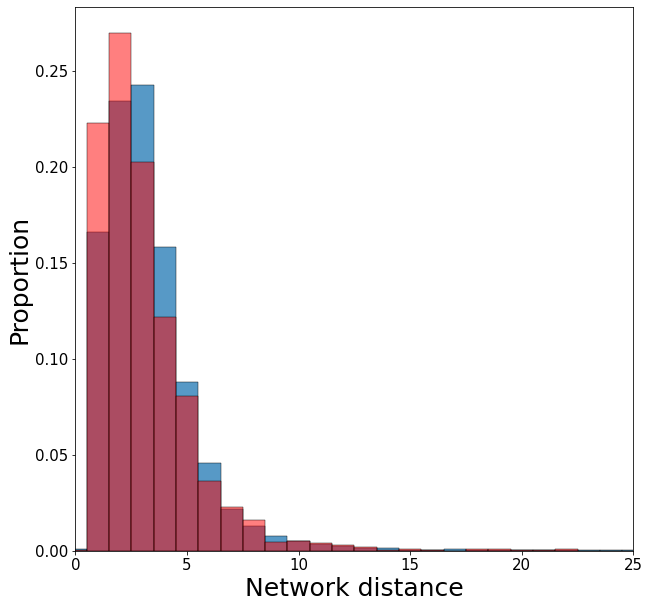

In [3]:
type_gene = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')
version_conversion = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/v5.3_to_v5.6_to_v6.csv', delimiter = '\t')
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2344 + CC2931).dropna()
DEGs.columns = ['index', 'sample', 'v6']
v5_DEGs = DEGs.set_index('v6').join(version_conversion.set_index('v6')[['v5.5_gene']]).drop(columns = ['index'])
  
plt.figure(figsize = (10, 10))
for sample in ['CC2344-L1']:
    pval = 0
    ## Opening shortest paths for observed samples ##
    sp = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/v5_DEGs/chlamynet_shortest_paths/' + sample + '.csv', delimiter = '\t')

    ## Opening shorest paths for simulated samples ##
    path_to_directory = '/research/projects/chlamydomonas/MAexpression/analysis/DEGs/simulated_DEGs/chlamynet_shortest_paths_2/'
    bootstrap = 0
    total_sim_sp = pd.DataFrame()
    total_sim_length = []
    for filename in glob.iglob(f'{path_to_directory}/bootstrap_*_' + sample + '.tsv'):
        bootstrap += 1
        sim_sp = pd.read_csv(filename, delimiter = '\t')
        total_sim_length += sim_sp['length'].values.tolist()
    total_sim_sp['length'] = total_sim_length
    
    ## Adding plots of simulated samples ##
    sns.histplot(data = total_sim_sp['length'], stat="density", discrete = True)
    
    ## Adding plots of observed samples ##
    if len(sp) != 0:
        sns.histplot(data = sp['length'], stat="density", discrete = True, color = 'red', alpha = 0.5)
        plt.ylabel('Proportion', fontsize = 25)
        plt.xlabel('Network distance', fontsize = 25)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.xlim(0, 25)
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/CC2344-L1_observed_vs_simulated_distance_Strenkert_coexpression_1.pdf', format = 'pdf', dpi = 600, bbox_inches = 'tight')
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/CC2344-L1_observed_vs_simulated_distance_Strenkert_coexpression_1.eps', format = 'eps', dpi = 600, bbox_inches = 'tight')

## Defunct Analysis: Not expression-dependent

### Simulated DEGs

In [ ]:
### OPENING FILES ####
mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')
conversion = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/v5.3_to_v5.6_to_v6.csv', delimiter = '\t')

DEGs_dic = {}
for i in DEGs.columns:
    DEGs_dic[i] = DEGs[i].dropna().values.tolist()
    
#### IMPORTING THE ANNOTATION FOR GENES IN VERSION 6 ####
v6_genes = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')

#### IMPORTING TOTAL BASE COUNT PER CHROMOSOME ####
simulated_DEGs = {}
for trials in range(0, 100):
    for sample in CC2344 + CC2931:
        v6 = random.choices(v6_genes['attributes'].values.tolist(), k=len(DEGs_dic[sample]))
        x = np.array(conversion.loc[conversion['v6'].isin(v6)]['v5.5_gene'])
        np.savetxt('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/simulated_DEGs/bootstraps/bootstrap_' + str(trials + 1) + '_' + sample + '.txt', x, delimiter=',', fmt = '%s')

### Observed vs Null distributions

CC2344-L1_pvalue = 0.0
CC2344-L2_pvalue = 0.01
CC2344-L3_pvalue = 0.75
CC2344-L4_pvalue = 0.0
CC2344-L5_pvalue = 0.15
CC2344-L6_pvalue = 0.0
CC2344-L7_pvalue = 0.42
CC2344-L8_pvalue = 0.45
CC2344-L9_pvalue = 0.0
CC2344-L10_pvalue = 0.0


<ipython-input-4-d76fca863613>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


CC2344-L11_pvalue = 0.0
CC2344-L12_pvalue = 0.0
CC2344-L13_pvalue = 0.74
CC2344-L14_pvalue = 0.79
CC2344-L15_pvalue = 0.0
CC2931-L1_pvalue = 0.0
CC2931-L2_pvalue = 0.0
CC2931-L3_pvalue = 0.69
CC2931-L4_pvalue = 0.01
CC2931-L5_pvalue = 0.0
CC2931-L6_pvalue = 0.0
CC2931-L7_pvalue = 0.1
CC2931-L9_pvalue = 0.14
CC2931-L10_pvalue = 0.0
CC2931-L11_pvalue = 0.0
CC2931-L13_pvalue = 0.02
CC2931-L14_pvalue = 0.0
CC2931-L15_pvalue = 0.0


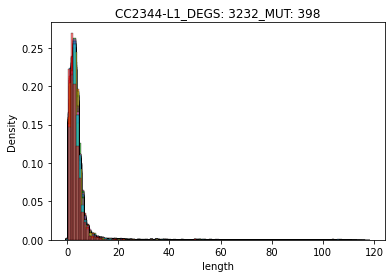

<Figure size 432x288 with 0 Axes>

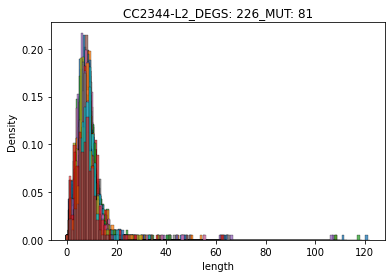

<Figure size 432x288 with 0 Axes>

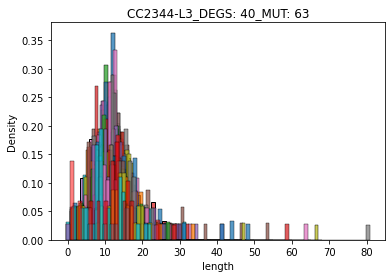

<Figure size 432x288 with 0 Axes>

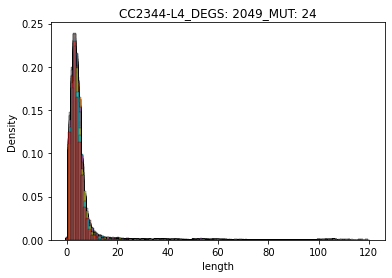

<Figure size 432x288 with 0 Axes>

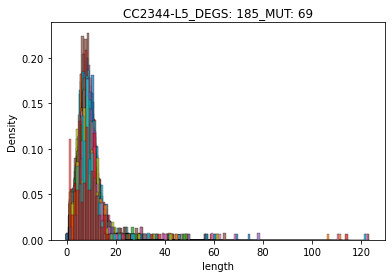

<Figure size 432x288 with 0 Axes>

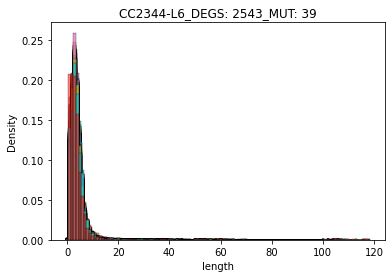

<Figure size 432x288 with 0 Axes>

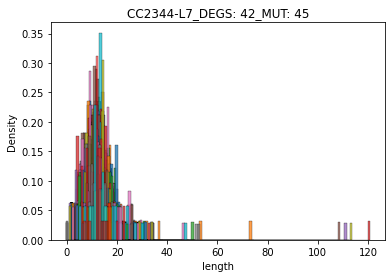

<Figure size 432x288 with 0 Axes>

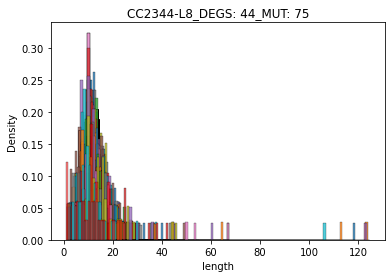

<Figure size 432x288 with 0 Axes>

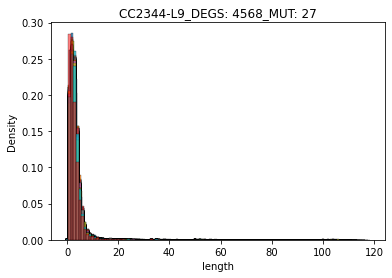

<Figure size 432x288 with 0 Axes>

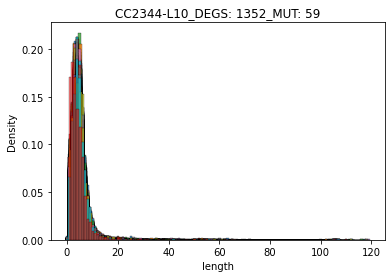

<Figure size 432x288 with 0 Axes>

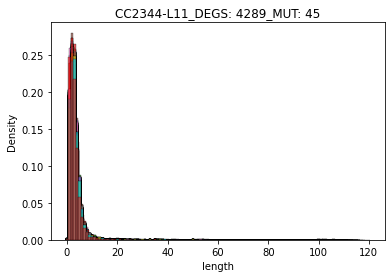

<Figure size 432x288 with 0 Axes>

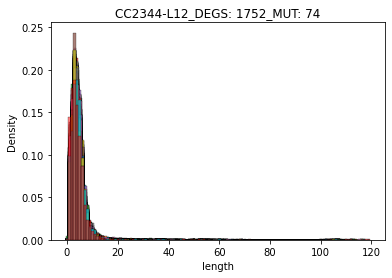

<Figure size 432x288 with 0 Axes>

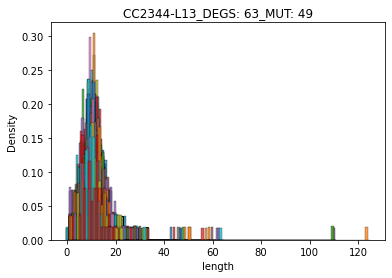

<Figure size 432x288 with 0 Axes>

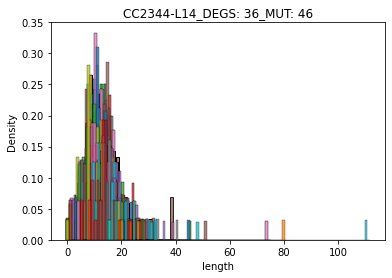

<Figure size 432x288 with 0 Axes>

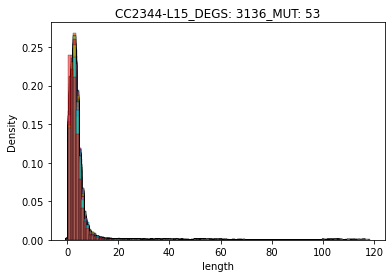

<Figure size 432x288 with 0 Axes>

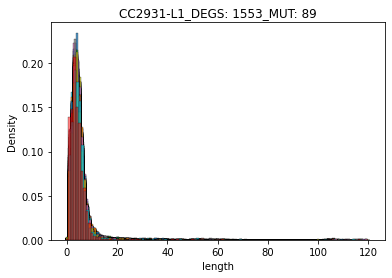

<Figure size 432x288 with 0 Axes>

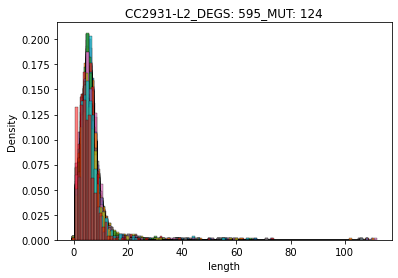

<Figure size 432x288 with 0 Axes>

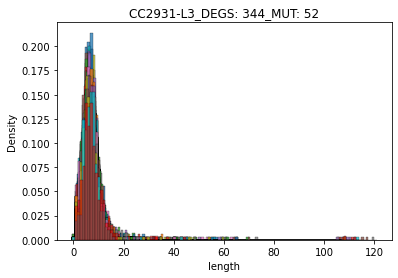

<Figure size 432x288 with 0 Axes>

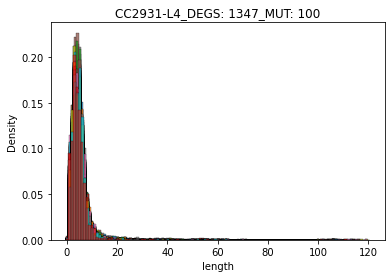

<Figure size 432x288 with 0 Axes>

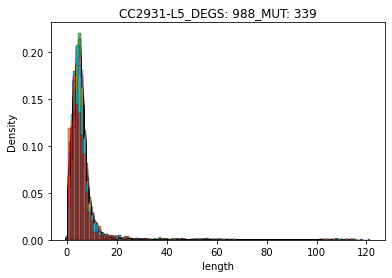

<Figure size 432x288 with 0 Axes>

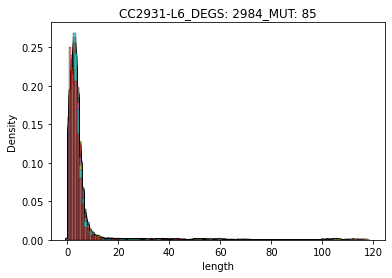

<Figure size 432x288 with 0 Axes>

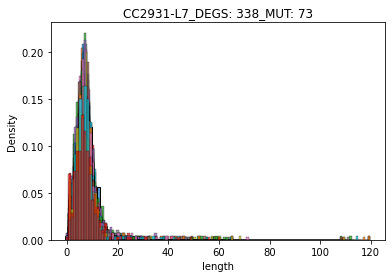

<Figure size 432x288 with 0 Axes>

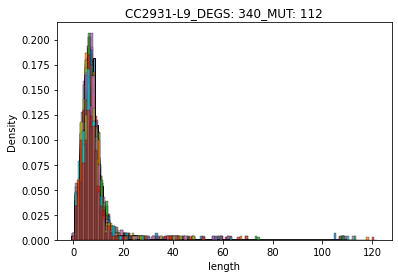

<Figure size 432x288 with 0 Axes>

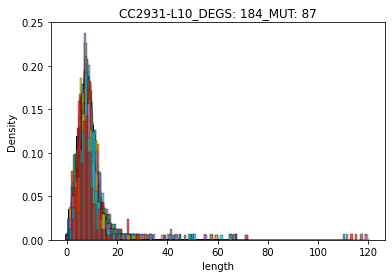

<Figure size 432x288 with 0 Axes>

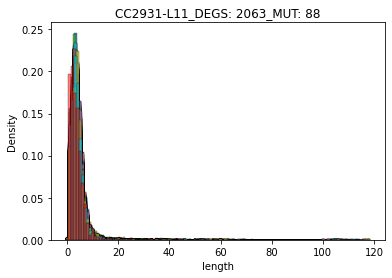

<Figure size 432x288 with 0 Axes>

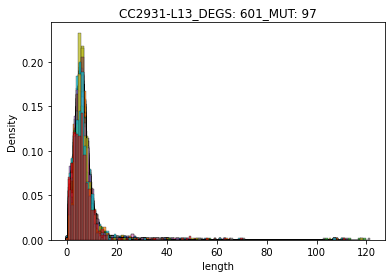

<Figure size 432x288 with 0 Axes>

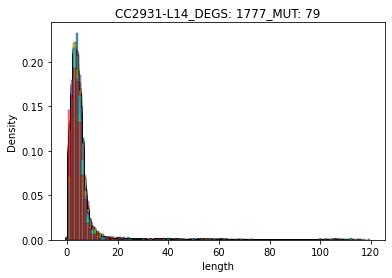

<Figure size 432x288 with 0 Axes>

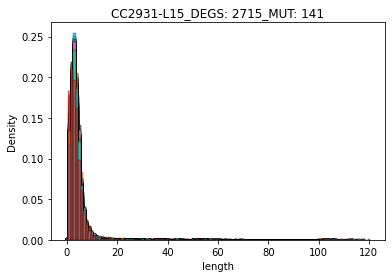

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
type_gene = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')
version_conversion = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/v5.3_to_v5.6_to_v6.csv', delimiter = '\t')
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',').reset_index()
DEGs = pd.melt(DEGs, id_vars = ['index'], value_vars = CC2344 + CC2931).dropna()
DEGs.columns = ['index', 'sample', 'v6']
v5_DEGs = DEGs.set_index('v6').join(version_conversion.set_index('v6')[['v5.5_gene']]).drop(columns = ['index'])
  
p_values = pd.DataFrame()

for sample in CC2344 + CC2931:
    pval = 0
    total_trials = 0
    ## Opening shortest paths for observed samples ##
    sp = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/v5_DEGs/chlamynet_shortest_paths/' + sample + '.csv', delimiter = '\t')

    ## Opening shorest paths for simulated samples ##
    path_to_directory = '/research/projects/chlamydomonas/MAexpression/analysis/DEGs/simulated_DEGs/chlamynet_shortest_paths/'
    bootstrap = 0
    for filename in glob.iglob(f'{path_to_directory}/bootstrap_*_' + sample + '.tsv'):
        bootstrap += 1
        sim_sp = pd.read_csv(filename, delimiter = '\t')
        if len(sim_sp) != 0:
            ## Adding plots of simulated samples ##
            sns.histplot(data = sim_sp['length'], stat="density", discrete = True)
            plt.title(sample + '_DEGS: ' + str(len(DEGs.loc[DEGs['sample'] == sample])) + '_MUT: ' + str(len(mutations.loc[mutations['sample'] == sample])))
            total_trials += 1
            ## p value ##
            if sim_sp['length'].median() <= sp['length'].median(): pval += 1
                
    ## Adding plots of observed samples ##
    if len(sp) != 0:
        sns.histplot(data = sp['length'], stat="density", discrete = True, color = 'red', alpha = 0.5)
        plt.title(sample + '_DEGS: ' + str(len(DEGs.loc[DEGs['sample'] == sample])) + '_MUT: ' + str(len(mutations.loc[mutations['sample'] == sample])))
        plt.figure()
    p_values.at[sample, 'p_value'] = pval/total_trials
    print(sample + '_pvalue = ' + str(pval/total_trials))
    plt.figure()
    
p_values.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/strenkert_coexpression_shortest_paths_pval.csv', sep = '\t', index = True, header = True)